In [242]:
import numpy as np

In [243]:
# math operations


# np.cos()
# np.sin()
# np.pi
# np.sqrt()
# np.tan()


#matrices are mxn - m rows by n cols

In [244]:
# Floating Point Calculations

In [245]:
# functions to calculate max number, min number, eps and how many numbers can be represented by a system
# takes parameters b,t,L,U where b stands for beta


# GUIDE - NOT FULLY ACCURATE
def numberSystemInfo(b,t,L,U):
    
    print(f"---------\nFor Number System ({b},{t},{L},{U}):\n")
    
    # calculate number of numbers representable
    total = 2 * (U-L+1) * (b-1)
    
    for i in range(t-1):
        total *= b
        
    total += 2
    
    print(f"Number of numbers representable = {total}")
    
    # calculate largest number
    largestVal = 0
    mult = b**(U-1)
    
    for i in range(t):
        largestVal += (b-1) * mult
        mult /= b
        
    print(f"The largest representable value is {largestVal:.6}")
        
    # calculate closest postive number to zero
    smallVal = b**(L-1)
    print(f"The smallest value representable is {smallVal}")
    
    # calculate epilson of the number system
    
    eps = 0.5 * b ** (1 - t)
    print(f"The machine epilison, {eps = }")


In [246]:
# test numberSystemInfo

#numberSystemInfo(10,2,-1,2)
#numberSystemInfo(2,23,-127,128)
numberSystemInfo(2,52,-1023,1024)


---------
For Number System (2,52,-1023,1024):

Number of numbers representable = 9223372036854775810
The largest representable value is 1.79769e+308
The smallest value representable is 5.562684646268003e-309
The machine epilison, eps = 2.220446049250313e-16


In [247]:
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------

In [248]:
# Residual Calculator

def residual(A,b,x):
    
    r = b - (A @ x)
    
    rMag = 0
    
    for xx in r:
        rMag += xx**2
        
    rMag = np.sqrt(rMag)
    
    #print(f"r = {r} \n\n    Magnitude = {rMag} ")
    return (rMag, r)

In [249]:
# test residual calculator

A = np.array([[2.0,-1.0,0.0],[-1.0,1.0,3.0],[1.0,0.0,1.0]])
b = np.array([1.0,3.0,2.0])
x = np.array([0.5,3.5,1.5])

residual(A,b,x)


(5.70087712549569, array([ 3.5, -4.5,  0. ]))

In [250]:
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------

In [251]:
# Sparse Matrices

In [252]:
# convert a matix A into sparse matrix storgae
# remember the zero indexing

def sparseMat(A):
    A_real = []
    I_row = []
    I_col = []
    
    for i in range(len(A)):
        for j in range(len(A[i])):
            if A[i][j] != 0:
                A_real.append(A[i][j])
                I_row.append(i)
                I_col.append(j)
                
    #print(f"A_real = {A_real}\n\nI_row = {I_row}\n\nI_col = {I_col}")
    return A_real,I_row,I_col

In [253]:
# convert sparse matrix into normal matrix

def sparseToNormal(A_real,I_row,I_col):
    
    # find out number of rows - m and number of columns - n
    m = max(I_row) + 1
    n = max(I_col) + 1
    
    # create a matrix full of zeros
    A = np.zeros((m,n))
    
    for i in range(len(A_real)):
        A[I_row[i]][I_col[i]] = A_real[i]
        
    return A

In [254]:
# multiply sparse matrix A such that z = Ay

def multSparse(A_real,I_row,I_col,y):
    
    A = sparseToNormal(A_real,I_row,I_col)
    
    #print(f"A = {A}\n\ny = {y}")
    
    z = A @ y
    
    return z   

In [255]:
# test sparse matrix functions

A = np.array([[1.0,0.0,1.0],[1.0,-1.0,0.0],[0.0,1.0,0.0]])
A = np.array([[2.0,0.0,0.0,1.0],[0.0,1.0,0.0,2.0]])
sA = sparseMat(A)
sparseToNormal(sA[0],sA[1],sA[2])


y = np.array([1.0,2.0,3.0,4.0])

multSparse(sA[0],sA[1],sA[2],y)


array([ 6., 10.])

In [256]:
# Gaussian Elemination

In [257]:
# ALGORITHM TO SOLVE AN UPPER TRIANGULAR MATRIX

# takes A in upper triangular form, along with b, to solve for x, returning x
def solveUpperTri(A,b):
    
    # find the dimensions of the triangular system - A should be sqaure
    dim = A.shape[0]
    
    x = np.zeros(dim)
    
    # start at bottom row of matrix and work up
    for i in range(dim-1,-1,-1):
        
        # find rowSum as the total of values not along diag * corresponding x val
        rowSum = 0
        for j in range(i+1,dim):
            rowSum += A[i][j] * x[j]
        
        x[i] = (b[i] - (rowSum))/A[i][i]
        
    return x 

In [258]:
# Can preform GE with pivoting if necessary - to do this, uncomment pivoting line

# take parameters A and b and return x (Ax = b)
def gE(A,b):
    
    # get the size of A
    numRows = A.shape[0]
    numCols = A.shape[1]
    
    # loop through rows
    for x in range(numRows):
        
        #print(f"before pivot on row {x}\n\n{A = }\n{b = }\n")
        
        #preform a pivot - UNCOMMENT TO USE PIVOTTING
        #A,b = pivot(A,b,x)
        
        #print(f"after pivot on row {x}\n\n{A = }\n{b = }\n--------------------------------\n")
        
        # get the index along the diagonal
        diag = A[x][x]
        # iterate through remaining rows
        for i in range(x+1,numRows):
            factor = A[i][x] / diag
            # iterate through each column from x and do the subtraction
            for j in range(x,numCols):
                A[i][j] = A[i][j] - factor * A[x][j]
                
            # update b
            b[i] = b[i] - factor * b[x]
                
    return A,b       


#function to pivot at a specfic given column
def pivot(A,b,i):
    dim = A.shape[0]
    
    #find the row with the biggest val in the column denoted by i
    maxValRow = i
    for j in range(i+1,dim):
        if A[j][i] > A[maxValRow][i]:
            maxValRow = j
        
            
    #pivot unless no need to (i.e. if maxValRow == i)
    if (maxValRow != i):
        temp1 = A[maxValRow].copy()
        A[maxValRow] = A[i]
        A[i] = temp1
        
        temp2 = b[maxValRow].copy()
        b[maxValRow] = b[i]
        b[i] = temp2
        
    return(A,b)

In [259]:
# example

A = np.array([[4.0,3.0,2.0,1.0],[1.0,2.0,2.0,2.0],[1.0,1.0,3.0,0.0],[2.0,1.0,2.0,3.0]])
b = np.array([10.0,7.0,5.0,8.0])

A1 = np.array([[0.0,1.0,0.0],[1.0,1.001,1.0],[100.0,100.0,0.0]])
b1 = np.array([0.0,1002.0,200.0])

A,b = gE(A,b)

solveUpperTri(A,b)

array([1., 1., 1., 1.])

///////////////////////

About GE:
- Time complexity of O(n^3)
- IF Aii is 0 and all rows below it in col i have 0 as well, then the algorithm, even with pivoting, breaks down
- Subject to rounding errors, where big - small may not have desired effect


In [260]:
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------

In [261]:
# LU Factorisation

In [262]:
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------

In [263]:
# Jacobi Iteration

In [264]:
# takes A and b as parameters along with an initial x guess - A should be square and its - number of iteration
def jacobi(A,b,x,its):
    # find dimension of A
    dim = A.shape[0]
    
    # find D^-1
    Dinverse = np.zeros((dim,dim))

    for i in range(dim):
        for j in range(dim):
            if i == j:
                Dinverse[i][j] = 1/A[i][j]
    
    for i in range(its):
        
        #print(f"{i} -> x = {x} | r Mag = {residual(A,b,x)[0]:.5}")
        
        #if residual(A,b,x)[0] < 0.05:
            #print(f"res less than target after {i} iterations")

        # find the next x
        x = x + Dinverse @ (b - A @ x)
    
    return x


In [265]:
# example

A = np.array([[2.0,1.0],[-1.0,4.0]])
b = np.array([3.5,0.5])
x = np.array([1,1])

jacobi(A,b,x,20)

array([1.5, 0.5])

In [266]:
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------

In [267]:
# Gauss-Seidel Iteration

In [268]:
# Gauss-Seidel Function, taking A,b and x0 and its (number of iterations) as parameters
def GS(A,b,x,its):
    
    n = x.shape[0]
    
    for it in range(its):
         
        print(f"{it} -> x = {x} | r Mag = {residual(A,b,x)[0]:.5}")
        
        #if residual(A,b,x)[0] < 0.05:
            #print(f"res less than target after {it} iterations")
        
        for i in range(n):

            sum1 = 0

            for j in range(n):
                sum1 += A[i][j] * x[j]
                
            x[i] += (1/A[i][i])*(b[i] - sum1)
    
    return x
        

In [269]:
# Example

A = np.array([[2.0,-1.0,0.0],[-1.0,1.0,3.0],[1.0,0.0,1.0]])
b = np.array([1.0,3.0,2.0])
x = np.array([0.0,0.0,0.0])

GS(A,b,x,3)



0 -> x = [0. 0. 0.] | r Mag = 3.7417
1 -> x = [0.5 3.5 1.5] | r Mag = 5.7009
2 -> x = [ 2.25  0.75 -0.25] | r Mag = 5.9266


array([0.875, 4.625, 1.125])

In [270]:
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------

In [271]:
# Euler's Method [  x(t1) = x(t0) + dt * x'(t0)      ])

In [272]:
# implement f'(x) as ff(x)
def ff(x,t):
    return -(x**2) + 1/t

def ff1(x,t):
    return np.cos(2*np.pi*x)

def ff2(y,t):
    return 2*t*(y**2)

In [273]:
# takes inital x0, dt, t0 and number of iterations to perfrom
def eulerMethod(x0,dt,t0,its,func):
    
    t = [0.0 for i in range(its+1)]
    x = [0.0 for i in range(its+1)]
    
    t[0] = t0
    x[0] = x0
    
    count = 1

    for i in range(1,its+1):
        x[i] = x[i-1] + func(x[i-1],t[i-1])*dt
        t[i] = t[i-1] + dt
        
        print(f"Euler: {count} -> t[i] = {t[i]:.4f} | x[i] = {x[i]:.4f}")
        count += 1
        
    return(t[-1],x[-1])
        

In [274]:
# example - using f'(x) = -y^2 + 1/t
# dt = 1/3
# t0 = 1
# tEnd = 2
# tSteps = 3
# y(1) = 2

eulerMethod(2,1/3,1,3,ff)

#eulerMethod(0,1/2,0,2,ff1)

eulerMethod(3.0,1/4,2.0,4,ff2)

Euler: 1 -> t[i] = 1.3333 | x[i] = 1.0000
Euler: 2 -> t[i] = 1.6667 | x[i] = 0.9167
Euler: 3 -> t[i] = 2.0000 | x[i] = 0.8366
Euler: 1 -> t[i] = 2.2500 | x[i] = 12.0000
Euler: 2 -> t[i] = 2.5000 | x[i] = 174.0000
Euler: 3 -> t[i] = 2.7500 | x[i] = 38019.0000
Euler: 4 -> t[i] = 3.0000 | x[i] = 1987524015.3750


(3.0, 1987524015.375)

In [275]:
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------

In [276]:
# Midpoint method

In [277]:
# takes inital x0, dt, t0 and number of iterations to perfrom
def midpointMethod(x0,dt,t0,its,func):
    
    t = [0.0 for i in range(its+1)]
    x = [0.0 for i in range(its+1)]
    
    t[0] = t0
    x[0] = x0
    
    count = 1

    for i in range(1,its+1):
        
        tMid, xMid = eulerMethod(x[i-1],dt/2, t[i-1],1,func)
        
        #print(f"{tMid = } | {xMid = }")
        
        x[i] = x[i-1] + func(xMid,tMid)*dt
        t[i] = t[i-1] + dt
        
        print(f"{count} -> t[i] = {t[i]:.5f} | x[i] = {x[i]:.5f}")
        
    return(t[-1],x[-1])

In [278]:
#midpointMethod(2,1/3,1,2,ff)

#midpointMethod(0,1/2,0,2,ff1)

midpointMethod(1.5,1/4,1.0,4,ff2)


Euler: 1 -> t[i] = 1.1250 | x[i] = 2.0625
1 -> t[i] = 1.25000 | x[i] = 3.89282
Euler: 1 -> t[i] = 1.3750 | x[i] = 8.6285
1 -> t[i] = 1.50000 | x[i] = 55.07751
Euler: 1 -> t[i] = 1.6250 | x[i] = 1192.6520
1 -> t[i] = 1.75000 | x[i] = 1155770.38231
Euler: 1 -> t[i] = 1.8750 | x[i] = 584415920543.8831
1 -> t[i] = 2.00000 | x[i] = 320195595173582067466240.00000


(2.0, 3.201955951735821e+23)

In [279]:
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------

In [280]:
# implement abs and rel errors - useful for non linear solvers

In [281]:
def relError(flx,x):
    
    if flx == None or x == None:
        return ""
    
    return abs(flx - x) / abs(x)

def absError(flx,x):
    
    if flx == None or x == None:
        return ""
    
    return abs(flx - x)

In [282]:
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------

In [283]:
# Non Linear Solvers

# First setting up some template functions


# f(x) maps to y = x^2 - 5
def f(x):
    return x**2 - 5

# ff(x) maps to derative of f(x)
def ff(x):
    return 2*x

def f1(x):
    m = 100000000
    return x**2 - (m + 1/m) * x + 1

# ff1(x) maps to derative of f1(x)
def ff1(x):
    m = 100000000
    return 2*x - (m + 1/m)

def f2(x):
    pass

def ff2(x):
    pass

def f3(x):
    pass

In [284]:
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------

In [285]:
# Bisection Method

In [286]:
# takes initial bracket of x1,x2 and tolerance to find a solution to
def bisectionMethod(x1,x2,func,tol = 0.0000000001,exact = None):
    
    fx1 = func(x1)
    fx2 = func(x2)
    
    count = 0
    
    
    # first ensure bracket is not postive - i.e. no solution in the interval
    if (fx1 * fx2) >= 0:
        return (f"With current bracket, no solution exist in its interval - current bracket = ({x1},{x2})")
        
    
    mid = (x1 + x2) /2
    
    while abs(x2-x1) > tol:
        
        mid = (x1+x2)/2
        fMid = func(mid)
        
        
        print(f"{count} -> x1 = {x1:.5} | x2 = {x2:.5} | mid = {mid:.5} | Errors for mid ! abs = {absError(mid,exact):.5} ! rel err = {relError(mid,exact)}\n")
            
        if (fx1 * fMid) > 0:
            #print("mid below solution")
            x1 = mid
            fx1 = fMid
        else:
            #print("mid above solution")
            x2 = mid
            fx2 = fMid
            
        count += 1
            
    return mid

In [287]:
#bisectionMethod(1.5,3.4,f)

bisectionMethod(0.0,0.1,f1,0.000000005,0.00000001)

0 -> x1 = 0.0 | x2 = 0.1 | mid = 0.05 | Errors for mid ! abs = 0.05 ! rel err = 4999999.0

1 -> x1 = 0.0 | x2 = 0.05 | mid = 0.025 | Errors for mid ! abs = 0.025 ! rel err = 2499999.0

2 -> x1 = 0.0 | x2 = 0.025 | mid = 0.0125 | Errors for mid ! abs = 0.0125 ! rel err = 1249999.0

3 -> x1 = 0.0 | x2 = 0.0125 | mid = 0.00625 | Errors for mid ! abs = 0.00625 ! rel err = 624999.0

4 -> x1 = 0.0 | x2 = 0.00625 | mid = 0.003125 | Errors for mid ! abs = 0.003125 ! rel err = 312499.0

5 -> x1 = 0.0 | x2 = 0.003125 | mid = 0.0015625 | Errors for mid ! abs = 0.0015625 ! rel err = 156249.0

6 -> x1 = 0.0 | x2 = 0.0015625 | mid = 0.00078125 | Errors for mid ! abs = 0.00078124 ! rel err = 78124.0

7 -> x1 = 0.0 | x2 = 0.00078125 | mid = 0.00039063 | Errors for mid ! abs = 0.00039062 ! rel err = 39061.5

8 -> x1 = 0.0 | x2 = 0.00039063 | mid = 0.00019531 | Errors for mid ! abs = 0.0001953 ! rel err = 19530.25

9 -> x1 = 0.0 | x2 = 0.00019531 | mid = 9.7656e-05 | Errors for mid ! abs = 9.7646e-05 ! 

8.940696716308595e-09

In [288]:
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------

In [289]:
# Newtons method

In [290]:
# requires an initial iterate, x and a tolerance, tol
def newtonsMethod(x,func,derative,tol = 0.00001,exact = None):
    
    fx = func(x)
    
    count = 0
    
    while abs(fx) > tol:
        
        x = x - fx/derative(x)
        
        fx = func(x)
    
        
        count += 1
        print(f"{count} -> x = {x:.5} | fx = {fx:.5} | abs error = {absError(x,exact)} | rel error = {relError(x,exact)} ")
        #input()
        
    return x

In [291]:
#newtonsMethod(1.0,f,ff)
newtonsMethod(10.0,f1,ff1,0.000000005,0.00000001)

1 -> x = -9.9e-07 | fx = 100.0 | abs error = 1.0000001973761618e-06 | rel error = 100.00001973761617 
2 -> x = 1e-08 | fx = 1.0048e-12 | abs error = 1.004859008129418e-20 | rel error = 1.004859008129418e-12 


9.999999999989952e-09

In [292]:
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------

In [293]:
# Quasi-Newton method

In [294]:
# default dx to sqrt of machine epsilon
def modifiedNewton(x,func,tol = 0.0000001,exact = None,dx = (np.finfo(float).eps)**0.5):
    
    fx = f(x)
    
    count = 0
    
    while abs(fx) > tol:
        
        # predict f'(x)
        ffx = (f(x+dx) - fx)/dx
        
        # update x
        x = x - fx/ffx
        
        # update fx
        fx = f(x)
        
        count += 1
        print(f"{count} -> x = {x:.5} | abs error = {absError(x,exact)} | rel error = {relError(x,exact)} ")
        
    return x

In [295]:
print(modifiedNewton(10,f,0.0000001,2.236067977,0.1))
#print(modifiedNewton(10.0,f1,0.000000005,0.00000001))

1 -> x = 5.2736 | abs error = 3.0375638637959983 | rel error = 1.3584398573925816 
2 -> x = 3.1312 | abs error = 0.8951173653876201 | rel error = 0.4003086554589213 
3 -> x = 2.3761 | abs error = 0.14000234829508829 | rel error = 0.06261095357347819 
4 -> x = 2.243 | abs error = 0.006924963024039776 | rel error = 0.0030969376133772953 
5 -> x = 2.2362 | abs error = 0.0001614600807293698 | rel error = 7.220714324883416e-05 
6 -> x = 2.2361 | abs error = 3.5373336322308546e-06 | rel error = 1.581943692506471e-06 
7 -> x = 2.2361 | abs error = 7.785867639498179e-08 | rel error = 3.48194586192501e-08 
8 -> x = 2.2361 | abs error = 2.19175477766953e-09 | rel error = 9.801825347948849e-10 
2.2360679791917546


In [296]:
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------

In [297]:
# Secant Method - requires two inital values (x1 and x2)
def secantMethod(x0,x1,func,tol = 0.000001,exact = None):
    
    fx0 = func(x0)
    fx1 = func(x1)
    
    count = 0
    
    while abs(fx1) > tol:
        
        x2 = x1 - (fx1*(x1-x0))/(fx1 - fx0)
        
        # update values
        x0 = x1
        x1 = x2
        
        fx0 = fx1
        fx1 = func(x1)
        
        count += 1
        print(f"{count} -> x0 = {x0:.5} | x1 = {x1:.5} | abs error = {absError(x1,exact)} | rel error = {relError(x1,exact)} ")
        
    return x1

In [298]:
print(secantMethod(1.0,6.0,f))
#print(secantMethod(0.0,400000.0,f1,0.000000005,0.00000001))

1 -> x0 = 6.0 | x1 = 1.5714 | abs error =  | rel error =  
2 -> x0 = 1.5714 | x1 = 1.9057 | abs error =  | rel error =  
3 -> x0 = 1.9057 | x1 = 2.2992 | abs error =  | rel error =  
4 -> x0 = 2.2992 | x1 = 2.2311 | abs error =  | rel error =  
5 -> x0 = 2.2311 | x1 = 2.236 | abs error =  | rel error =  
6 -> x0 = 2.236 | x1 = 2.2361 | abs error =  | rel error =  
2.2360680543591553


In [299]:
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------

In [300]:
# approx a best fit line of any dimension

In [301]:
# plots graph of approxBestFit

import matplotlib.pyplot as plt

def plotGraph(mat,coordinates):
    xs = [x[0] for x in coordinates]
    ys = [x[1] for x in coordinates]
    
    # find x interval to plot the graph
    xx = [x for x in np.arange(min(xs)-1,max(xs)+1,0.05)]
    # calculate y coors for each x val
    #yy = [quad[0] + x * quad[1] + x**2 * quad[2] for x in xx]
    yy = []
    
    
    for x in xx:
        y = 0
        
        for i in range(len(mat)):
            y +=  x**i * mat[i]
            
        yy.append(y)
            
    plt.figure(3)
    plt.scatter(xs, ys)
    plt.plot(xx,yy)
    plt.xlabel("time")
    plt.ylabel("y")
    plt.grid()
    plt.show()

In [302]:
# takes a series of cooridnates in form [(x0,y0),(x1,y1),(x2,y2),(x3,y3),...] as coors
# takes a dimension (1 = linear, 2 = quadratic, 3 = cubic)
def approxBestFit(coors,dim):
    
    # get Number of coors
    n = len(coors)
    
    # set up matrices
    b = np.zeros(n)
    A = np.zeros((n,dim+1))
    
    # set up b and A
    for i in range(n):
        b[i] = coors[i][1]
        
        A[i][0] = 1
        
        for j in range(1,dim+1):
            A[i][j] = coors[i][0] ** j
            
    AtA = np.transpose(A) @ A
    Atb = np.transpose(A) @ b
    
    # find x
    x = np.linalg.solve(AtA, Atb)
    
    # plot graph
    plotGraph(x,coors)
    
    #print(f"{b = }\n\n{A = }\n\n{AtA = }\n\n{Atb = }\n\n{x = }")
    return x

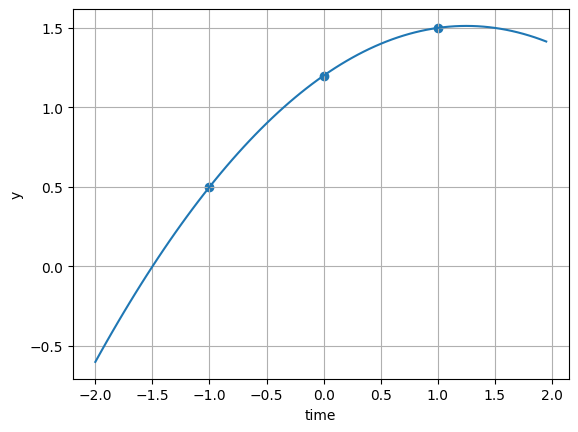

array([ 1.2,  0.5, -0.2])

In [303]:
# test approxBestFit

coors = [(-1.0,1.0),(-0.5,0.5),(0.0,0.0),(0.5,0.5),(1.0,2.0)]

coors2 = [(-1.0,0.5),(0.0,1.2),(1.0,1.5)]
approxBestFit(coors2,2)

In [304]:
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------
# ---------------------------------

In [305]:
'''
To ADD:

--> Robust Linear Solvers
--> Descriptions of each algorithm, including advantages and disadvatages, along with uses

'''

'\nTo ADD:\n\n--> Robust Linear Solvers\n--> Descriptions of each algorithm, including advantages and disadvatages, along with uses\n\n'